### Importing the required Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as pgo
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet
from prophet.plot import plot_plotly

#### Importing and Loading the dataset

In [2]:
df = pd.read_csv('..\\dataset\\covid-19.csv')
df.head(5)

,Unnamed: 0,Date,Country,Confirmed,Recovered,Deaths
0,0,2020-01-22,Afghanistan,0,0,0
1,1,2020-01-23,Afghanistan,0,0,0
2,2,2020-01-24,Afghanistan,0,0,0
3,3,2020-01-25,Afghanistan,0,0,0
4,4,2020-01-26,Afghanistan,0,0,0


### Time Series Forecasting for confirmed cases in India

#### Extracting the date and confirmed columns of India data from original data

In [3]:
india_data = df[df['Country']=='India'][['Date','Confirmed']]
india_data

,Date,Confirmed
65280,2020-01-22,0
65281,2020-01-23,0
65282,2020-01-24,0
65283,2020-01-25,0
65284,2020-01-26,0
...,...,...
66091,2022-04-12,43038016
66092,2022-04-13,43039023
66093,2022-04-14,43039972
66094,2022-04-15,43040947


#### Finding out the complete information of India data

In [4]:
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 65280 to 66095
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       816 non-null    object
 1   Confirmed  816 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 19.1+ KB


#### Plotting the confirmed cases with respect to time

In [5]:
fig = px.line(india_data,x='Date',y='Confirmed',title="Time Series Graph for Confirmed Cases")
fig.show()

#### Converting the date column of India data

In [6]:
india_data['Date'] = pd.to_datetime(india_data['Date'])
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 65280 to 66095
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       816 non-null    datetime64[ns]
 1   Confirmed  816 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.1 KB


#### Renaming the columns of the India data

In [7]:
india_data.rename(columns={'Date':'ds','Confirmed':'y'},inplace=True)
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 65280 to 66095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      816 non-null    datetime64[ns]
 1   y       816 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.1 KB


#### Initialization of Time Series Model

In [8]:
model = Prophet()
model.fit(india_data)

18:14:08 - cmdstanpy - INFO - Chain [1] start processing
18:14:13 - cmdstanpy - INFO - Chain [1] done processing


#### Creation of the Future Dates for next 1 year (365 days)

In [9]:
future_pred = model.make_future_dataframe(periods=365)
future_pred

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
1176,2023-04-12
1177,2023-04-13
1178,2023-04-14
1179,2023-04-15


#### Comparing the number of rows of the original data and future data

In [10]:
print(f"Original Dataset number of rows : {india_data.shape[0]}")
print(f"Generated Future Dataset number of rows : {future_pred.shape[0]}")

Original Dataset number of rows : 816
Generated Future Dataset number of rows : 1181


#### Finding out the modes of the model

In [11]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

#### Prediction of the Future Data

In [12]:
prediction = model.predict(future_pred)
prediction.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,50182.350471,-702791.089456,-288066.559239,50182.350471,50182.350471,-552814.320930,-552814.320930,-552814.320930,608.659798,608.659798,608.659798,-553422.980729,-553422.980729,-553422.980729,0.0,0.0,0.0,-502631.970459
1,2020-01-23,-39930.900682,-621142.407486,-202152.380182,-39930.900682,-39930.900682,-374524.774615,-374524.774615,-374524.774615,699.365209,699.365209,699.365209,-375224.139824,-375224.139824,-375224.139824,0.0,0.0,0.0,-414455.675297
2,2020-01-24,-130044.151836,-531600.258673,-114955.645447,-130044.151836,-130044.151836,-198144.616918,-198144.616918,-198144.616918,1653.907603,1653.907603,1653.907603,-199798.524521,-199798.524521,-199798.524521,0.0,0.0,0.0,-328188.768754
3,2020-01-25,-220157.402989,-456066.831158,-20087.442550,-220157.402989,-220157.402989,-26556.252520,-26556.252520,-26556.252520,1312.899890,1312.899890,1312.899890,-27869.152410,-27869.152410,-27869.152410,0.0,0.0,0.0,-246713.655509
4,2020-01-26,-310270.654143,-378356.952578,64086.145872,-310270.654143,-310270.654143,143964.889861,143964.889861,143964.889861,4075.613201,4075.613201,4075.613201,139889.276660,139889.276660,139889.276660,0.0,0.0,0.0,-166305.764282
5,2020-01-27,-400383.905296,-310976.354860,129251.872366,-400383.905296,-400383.905296,299511.126571,299511.126571,299511.126571,-3341.828105,-3341.828105,-3341.828105,302852.954676,302852.954676,302852.954676,0.0,0.0,0.0,-100872.778725
6,2020-01-28,-490497.156450,-258218.262062,179565.925681,-490497.156450,-490497.156450,455442.050818,455442.050818,455442.050818,-5008.617597,-5008.617597,-5008.617597,460450.668415,460450.668415,460450.668415,0.0,0.0,0.0,-35055.105631
7,2020-01-29,-580610.407603,-173354.037125,245784.579037,-580610.407603,-580610.407603,612773.360838,612773.360838,612773.360838,608.659798,608.659798,608.659798,612164.701039,612164.701039,612164.701039,0.0,0.0,0.0,32162.953234
8,2020-01-30,-670723.658757,-135739.235201,296188.770122,-670723.658757,-670723.658757,758230.382079,758230.382079,758230.382079,699.365209,699.365209,699.365209,757531.016871,757531.016871,757531.016871,0.0,0.0,0.0,87506.723322
9,2020-01-31,-760836.909910,-85981.492417,339976.993808,-760836.909910,-760836.909910,897792.732599,897792.732599,897792.732599,1653.907603,1653.907603,1653.907603,896138.824996,896138.824996,896138.824996,0.0,0.0,0.0,136955.822689


#### Plotting the components of the predicted data

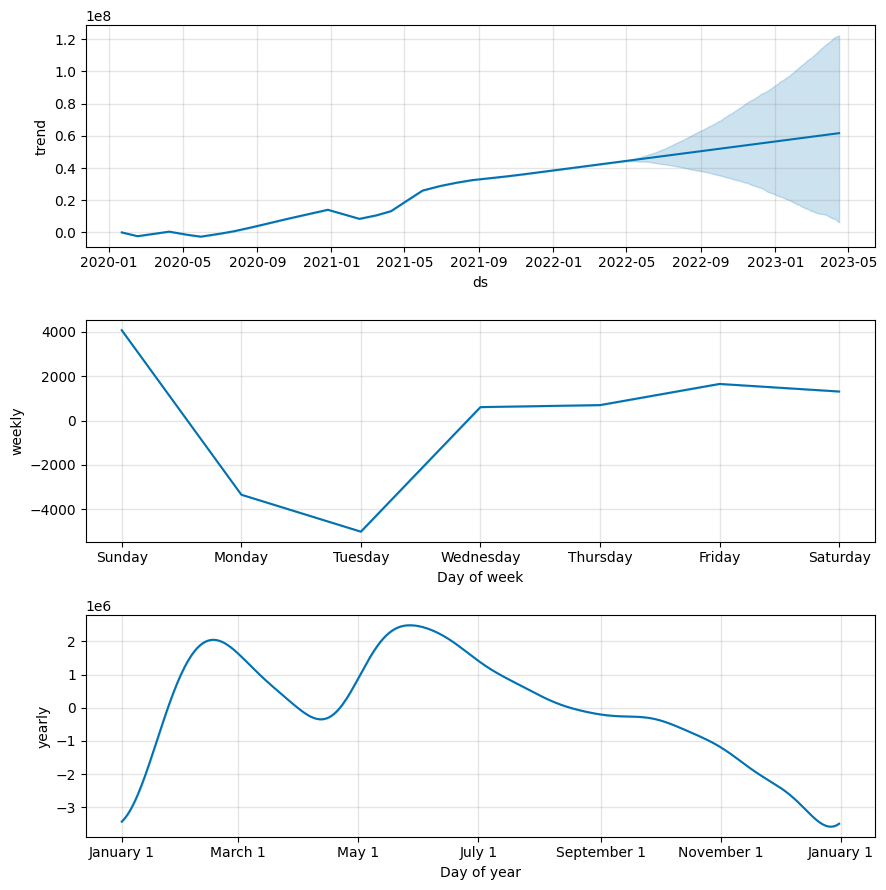

In [13]:
fig = model.plot_components(prediction)
plt.show()

#### Plotting the forecast of the time series model

In [14]:
fig = plot_plotly(model,prediction,xlabel='Time',ylabel='Confirmed cases')
fig.update_layout(title='Forecast graph of Time Series model')
fig.show()

### Time Series Forecasting for Recovered cases in India

#### Extracting date and recovered columns of India data from original data

In [15]:
india_data = df[df['Country']=='India'][['Date','Recovered']]
india_data

,Date,Recovered
65280,2020-01-22,0
65281,2020-01-23,0
65282,2020-01-24,0
65283,2020-01-25,0
65284,2020-01-26,0
...,...,...
66091,2022-04-12,0
66092,2022-04-13,0
66093,2022-04-14,0
66094,2022-04-15,0


#### Finding out the complete information of India data

In [16]:
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 65280 to 66095
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       816 non-null    object
 1   Recovered  816 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 19.1+ KB


#### Plotting the recovered cases with respect to time

In [17]:
fig = px.line(india_data,x='Date',y='Recovered',title="Time Series Graph for Recovered Cases")
fig.show()

#### Converting the date column of India data

In [18]:
india_data['Date'] = pd.to_datetime(india_data['Date'])
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 65280 to 66095
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       816 non-null    datetime64[ns]
 1   Recovered  816 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.1 KB


#### Renaming the columns of India data

In [19]:
india_data.rename(columns={'Date' : 'ds','Recovered' : 'y'},inplace=True)
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 65280 to 66095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      816 non-null    datetime64[ns]
 1   y       816 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.1 KB


#### Initialization of Time Series model

In [20]:
model = Prophet()
model.fit(india_data)

18:14:14 - cmdstanpy - INFO - Chain [1] start processing
18:14:14 - cmdstanpy - INFO - Chain [1] done processing


#### Creation of future dates for next 1 year (365 days)

In [21]:
future = model.make_future_dataframe(periods=365)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
1176,2023-04-12
1177,2023-04-13
1178,2023-04-14
1179,2023-04-15


#### Comparing the number of rows of the original data and future data

In [22]:
print(f"Original Dataset number of rows : {india_data.shape[0]}")
print(f"Generated Future Dataset number of rows : {future.shape[0]}")

Original Dataset number of rows : 816
Generated Future Dataset number of rows : 1181


#### Checking the modes of the model

In [23]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

#### Prediction of the future data

In [24]:
prediction = model.predict(future)
prediction.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,2.148037e+06,-3.234053e+06,4.633553e+06,2.148037e+06,2.148037e+06,-1.379134e+06,-1.379134e+06,-1.379134e+06,111348.125051,111348.125051,111348.125051,-1.490483e+06,-1.490483e+06,-1.490483e+06,0.0,0.0,0.0,768902.397134
1,2020-01-23,2.111488e+06,-3.556220e+06,4.646946e+06,2.111488e+06,2.111488e+06,-1.592482e+06,-1.592482e+06,-1.592482e+06,-114247.570271,-114247.570271,-114247.570271,-1.478234e+06,-1.478234e+06,-1.478234e+06,0.0,0.0,0.0,519006.243513
2,2020-01-24,2.074940e+06,-3.709889e+06,4.647544e+06,2.074940e+06,2.074940e+06,-1.545106e+06,-1.545106e+06,-1.545106e+06,-74450.857047,-74450.857047,-74450.857047,-1.470656e+06,-1.470656e+06,-1.470656e+06,0.0,0.0,0.0,529833.128787
3,2020-01-25,2.038391e+06,-3.884166e+06,4.429656e+06,2.038391e+06,2.038391e+06,-1.502650e+06,-1.502650e+06,-1.502650e+06,-34387.162858,-34387.162858,-34387.162858,-1.468263e+06,-1.468263e+06,-1.468263e+06,0.0,0.0,0.0,535740.910395
4,2020-01-26,2.001842e+06,-3.569470e+06,4.499342e+06,2.001842e+06,2.001842e+06,-1.474706e+06,-1.474706e+06,-1.474706e+06,-3330.949500,-3330.949500,-3330.949500,-1.471375e+06,-1.471375e+06,-1.471375e+06,0.0,0.0,0.0,527136.325045
5,2020-01-27,1.965294e+06,-3.467161e+06,4.943830e+06,1.965294e+06,1.965294e+06,-1.442709e+06,-1.442709e+06,-1.442709e+06,37393.167879,37393.167879,37393.167879,-1.480103e+06,-1.480103e+06,-1.480103e+06,0.0,0.0,0.0,522584.124624
6,2020-01-28,1.928745e+06,-3.651120e+06,4.410200e+06,1.928745e+06,1.928745e+06,-1.416670e+06,-1.416670e+06,-1.416670e+06,77675.246745,77675.246745,77675.246745,-1.494345e+06,-1.494345e+06,-1.494345e+06,0.0,0.0,0.0,512075.139617
7,2020-01-29,1.892196e+06,-3.749397e+06,4.494041e+06,1.892196e+06,1.892196e+06,-1.402446e+06,-1.402446e+06,-1.402446e+06,111348.125051,111348.125051,111348.125051,-1.513794e+06,-1.513794e+06,-1.513794e+06,0.0,0.0,0.0,489750.522357
8,2020-01-30,1.855648e+06,-3.758044e+06,4.447510e+06,1.855648e+06,1.855648e+06,-1.652192e+06,-1.652192e+06,-1.652192e+06,-114247.570271,-114247.570271,-114247.570271,-1.537944e+06,-1.537944e+06,-1.537944e+06,0.0,0.0,0.0,203455.935395
9,2020-01-31,1.819099e+06,-4.052928e+06,4.453206e+06,1.819099e+06,1.819099e+06,-1.640562e+06,-1.640562e+06,-1.640562e+06,-74450.857047,-74450.857047,-74450.857047,-1.566111e+06,-1.566111e+06,-1.566111e+06,0.0,0.0,0.0,178536.714563


#### Plotting the components of the predicted data

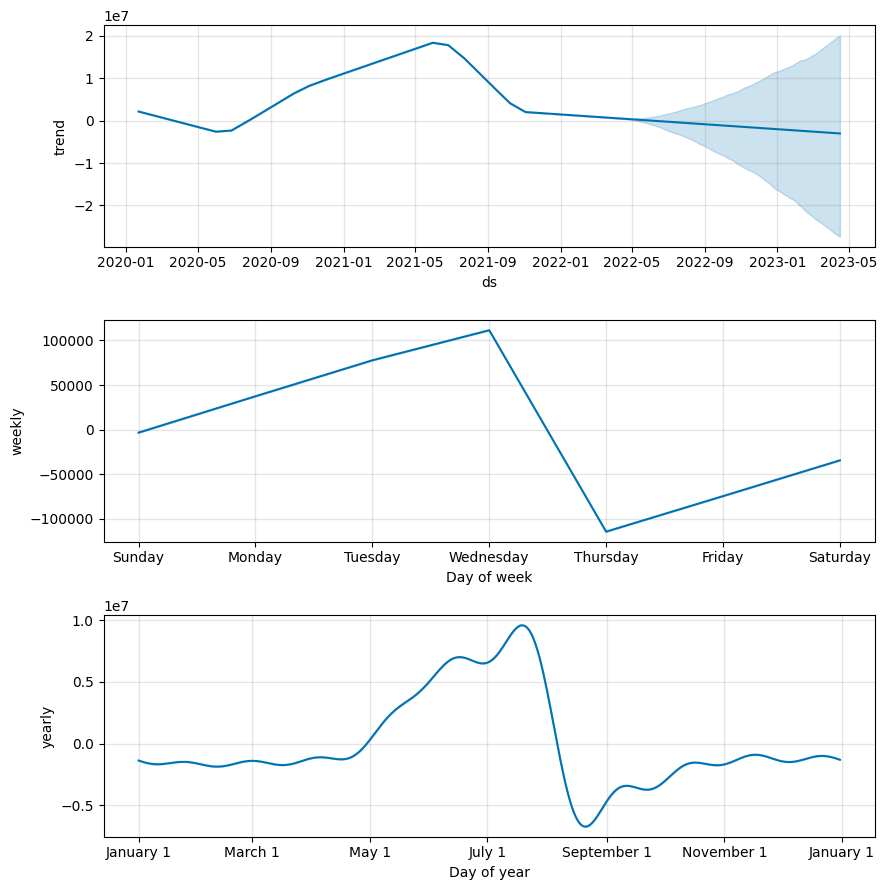

In [25]:
fig = model.plot_components(prediction)
fig.show()

#### Plotting the forecast of the Time Series model

In [26]:
fig = plot_plotly(model,prediction,xlabel='Time',ylabel='Recovered Cases')
fig.update_layout(title='Forecast graph of Time Series Model')
fig.show()

### Time Series Forecasting for death cases in India

#### Extracting the date and death colums of India data

In [27]:
india_data = df[df['Country']=='India'][['Date','Deaths']]
india_data

,Date,Deaths
65280,2020-01-22,0
65281,2020-01-23,0
65282,2020-01-24,0
65283,2020-01-25,0
65284,2020-01-26,0
...,...,...
66091,2022-04-12,521736
66092,2022-04-13,521737
66093,2022-04-14,521743
66094,2022-04-15,521747


#### Finding out the complete information of the India data

In [28]:
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 65280 to 66095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    816 non-null    object
 1   Deaths  816 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 19.1+ KB


#### Plotting the death cases with respect to time

In [29]:
fig = px.line(india_data,x='Date',y='Deaths',title="Time Series Graph for Death Cases")
fig.show()

#### Converting the date column of India data

In [30]:
india_data['Date'] = pd.to_datetime(india_data['Date'])
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 65280 to 66095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    816 non-null    datetime64[ns]
 1   Deaths  816 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.1 KB


#### Renaming the columns of India data

In [31]:
india_data.rename(columns={'Date' : 'ds','Deaths' : 'y'},inplace=True)
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 65280 to 66095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      816 non-null    datetime64[ns]
 1   y       816 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.1 KB


#### Initialization of Time Series model

In [32]:
model = Prophet()
model.fit(india_data)

18:14:14 - cmdstanpy - INFO - Chain [1] start processing


18:14:15 - cmdstanpy - INFO - Chain [1] done processing


#### Creation of the Future Dates for next 1 year (365 days)

In [33]:
future = model.make_future_dataframe(periods=365)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
1176,2023-04-12
1177,2023-04-13
1178,2023-04-14
1179,2023-04-15


#### Comparing the number of rows of the original data and future data

In [34]:
print(f"Original Dataset number of rows : {india_data.shape[0]}")
print(f"Generated Future Dataset number of rows : {future.shape[0]}")

Original Dataset number of rows : 816
Generated Future Dataset number of rows : 1181


#### Checking the modes of the model

In [35]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

#### Prediction of the future data

In [36]:
prediction = model.predict(future)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,11611.151104,-1046.096750,1475.053668,11611.151104,11611.151104,-11374.422293,-11374.422293,-11374.422293,-24.891789,-24.891789,-24.891789,-11349.530504,-11349.530504,-11349.530504,0.0,0.0,0.0,236.728811
1,2020-01-23,11398.874629,-1293.390166,1460.497489,11398.874629,11398.874629,-11329.126854,-11329.126854,-11329.126854,0.308391,0.308391,0.308391,-11329.435245,-11329.435245,-11329.435245,0.0,0.0,0.0,69.747775
2,2020-01-24,11186.598154,-1382.197258,1307.285228,11186.598154,11186.598154,-11219.017448,-11219.017448,-11219.017448,55.354743,55.354743,55.354743,-11274.372190,-11274.372190,-11274.372190,0.0,0.0,0.0,-32.419293
3,2020-01-25,10974.321679,-1477.331991,1181.455702,10974.321679,10974.321679,-11153.694082,-11153.694082,-11153.694082,31.398146,31.398146,31.398146,-11185.092227,-11185.092227,-11185.092227,0.0,0.0,0.0,-179.372402
4,2020-01-26,10762.045204,-1614.334666,1138.659477,10762.045204,10762.045204,-11044.768845,-11044.768845,-11044.768845,18.015422,18.015422,18.015422,-11062.784268,-11062.784268,-11062.784268,0.0,0.0,0.0,-282.723641


#### Plotting the components of the predicited data

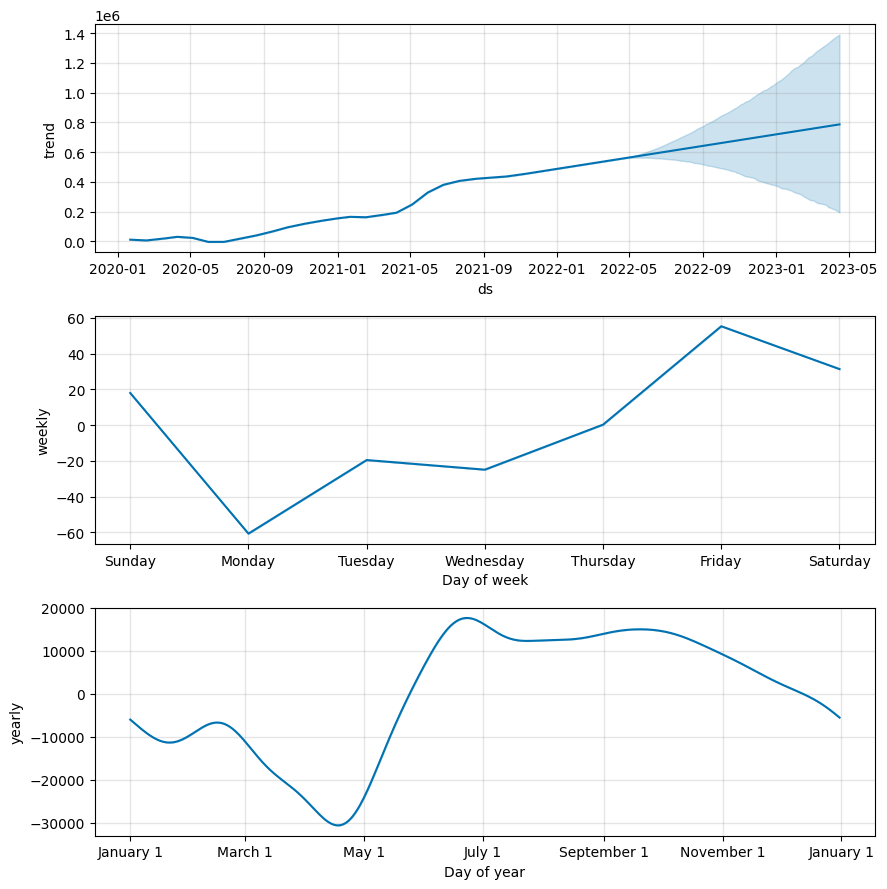

In [37]:
fig = model.plot_components(prediction)
fig.show()

#### Plotting the forecast of the Time Series model

In [38]:
fig = plot_plotly(model,prediction,xlabel='Time',ylabel='Death Cases')
fig.update_layout(title='Forecast graph of Time Series Model')
fig.show()